In [1]:
# we're in the endgame now

from controller import *
%matplotlib inline

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Starting at timestep 1


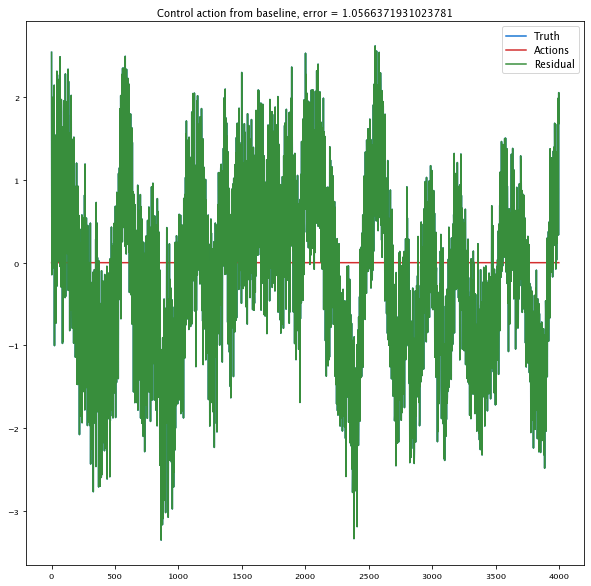

In [2]:
show_control('baseline')

Starting at timestep 3


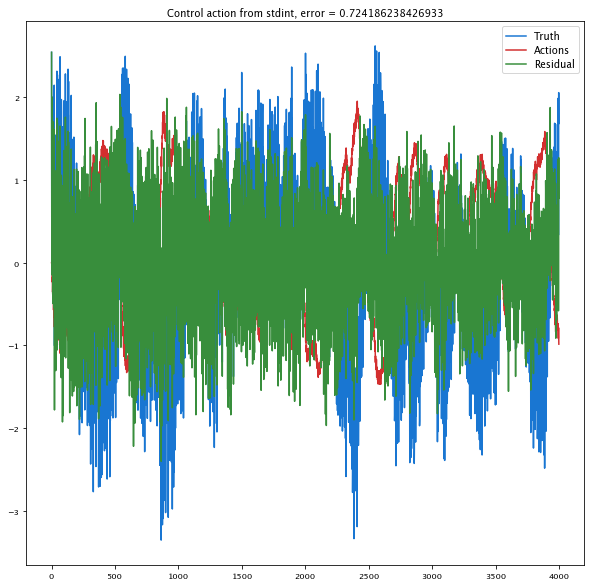

In [3]:
show_control('stdint')

Starting at timestep 4


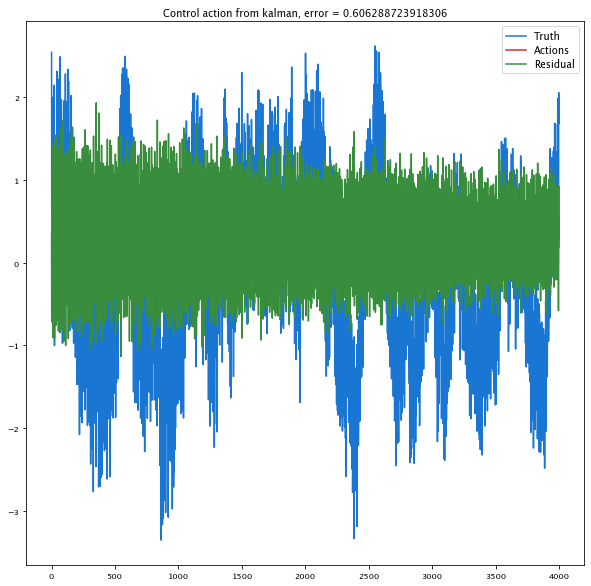

In [16]:
run, predict = vibe.kfilter.run(truth[:steps] + np.random.normal(0, 0.06, (steps,)), save_physics=True)
show_control('kalman', truth - run)

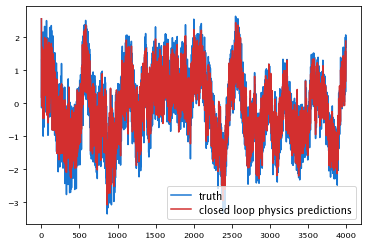

In [8]:
run, predict = vibe.kfilter.run(truth[:steps] + np.random.normal(0, 0.06, (steps,)), save_physics=True)
#plt.plot(run, label = 'kfilter output')
plt.plot(truth[:steps], label='truth')
plt.plot(predict, label='closed loop physics predictions')
plt.legend()

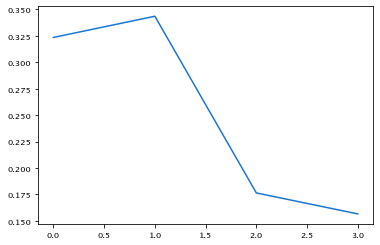

In [9]:
plt.plot(kalman.kfilter.A[0])